In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

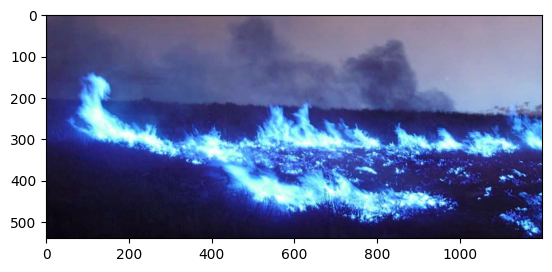

In [2]:
DATADIR= "G:\My Drive\Ingegneria\Data Science GD\Models\CNN\Damage Detection"
CATEGORIES=["Damaged","Undamaged"]
#Iterate through the two categories
for category in CATEGORIES:
    path= os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img)) 
        plt.imshow(img_array)
        plt.show()
        break
    break

In [3]:
for category in CATEGORIES:
    print(CATEGORIES.index(category))

0
1


In [4]:
IMG_SIZE= 200
#Resizing all images to one size 
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category) # 0 or 1
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
    return training_data


In [5]:
training_data = create_training_data()

In [6]:
new_array = [training_elem[0] for training_elem in training_data]
class_num = [training_elem[1] for training_elem in training_data]

In [7]:
#checkig number of images
len(new_array)

499

In [8]:
#Checking the new image size 
new_array[0].shape

(200, 200, 3)

In [9]:
'''
The images are being converted to an array for a couple of reasons:
Consistent Input Structure: Neural networks require their input to have a consistent structure. By converting the images to arrays, we ensure that every image is represented in the same way, as a 3D array of pixel intensities.
Efficient Computation: Mathematical operations that are part of the neural network (like dot products) can be performed more efficiently on arrays.

The reshape(-1,IMG_SIZE,IMG_SIZE,3) function is used to reshape the array into a suitable shape for the Convolutional Neural Network (CNN). Here, IMG_SIZE is the height and width of the image, and 3 corresponds to the three color channels (Red, Green, Blue). The -1 allows numpy to automatically calculate the size of the first dimension (number of images), based on the length of the input array and the other dimensions.
'''

#Creating features and labels for the images in our dataset
X_calamity=[]#features
y_calamity=[]#labels
for features, label in training_data:
    X_calamity.append(features)
    y_calamity.append(label)
#Converting image input to array 
X_calamity= np.array(X_calamity).reshape(-1,IMG_SIZE,IMG_SIZE,3)
#Normalising the image input array
X_calamity=X_calamity/255.0

X_calamity.shape


(499, 200, 200, 3)

In [10]:
model = Sequential()
#Second Convolutional layer
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same', activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Third Convolutional layer
model.add(Conv2D(kernel_size=3, strides=1, filters=128, padding='same', activation='relu', name='layer_conv3'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Drop-out layer 
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=2, strides=2))
#Fourth Convolutional layer
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same', activation='relu', name='layer_conv4'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Fifth Convolutional layer
model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same', activation='relu', name='layer_conv5'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Sixth Convolutional layer
model.add(Conv2D(kernel_size=3, strides=1, filters=16, padding='same', activation='relu', name='layer_conv6'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32)) #Fully Connected Layer
model.add(Activation("relu"))
#Output layer 
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss="binary_crossentropy",
             optimizer="adam", metrics=['accuracy'])

In [11]:
#The None is a placeholder for the batch size, and it means that the model can accept batches of varying sizes.
model.build(input_shape=(None, IMG_SIZE, IMG_SIZE, 3))

In [12]:
#Displaying model summary statistics
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_conv2 (Conv2D)        (None, 200, 200, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 layer_conv3 (Conv2D)        (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 50, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [13]:
X_calamity.shape

(499, 200, 200, 3)

In [14]:
y_calamity = np.array(y_calamity)
y_calamity.shape

(499,)

In [15]:
model.fit(X_calamity, y_calamity, batch_size=65, epochs=20, validation_split=0.1)

Epoch 1/20
7/7 [==============================] - 7s 432ms/step - loss: 0.6690 - accuracy: 0.5256 - val_loss: 0.6657 - val_accuracy: 0.8200
Epoch 2/20
7/7 [==============================] - 1s 103ms/step - loss: 0.5156 - accuracy: 0.7617 - val_loss: 0.3296 - val_accuracy: 0.9600
Epoch 3/20
7/7 [==============================] - 1s 102ms/step - loss: 0.4012 - accuracy: 0.8062 - val_loss: 0.6362 - val_accuracy: 0.8200
Epoch 4/20
7/7 [==============================] - 1s 103ms/step - loss: 0.3779 - accuracy: 0.8196 - val_loss: 0.4980 - val_accuracy: 0.9200
Epoch 5/20
7/7 [==============================] - 1s 103ms/step - loss: 0.3192 - accuracy: 0.8731 - val_loss: 0.4351 - val_accuracy: 0.8400
Epoch 6/20
7/7 [==============================] - 1s 105ms/step - loss: 0.2917 - accuracy: 0.8864 - val_loss: 0.4068 - val_accuracy: 0.9000
Epoch 7/20
7/7 [==============================] - 1s 103ms/step - loss: 0.2640 - accuracy: 0.8976 - val_loss: 0.4804 - val_accuracy: 0.9000
Epoch 8/20
7/7 [====

In [16]:
#Evaluating the model
result = model.evaluate(x=X_calamity, y=y_calamity)

16/16 [==============================] - 1s 31ms/step - loss: 0.1024 - accuracy: 0.9780


In [ ]:
# #Helper Function to plot images 
# def plot_images(images, cls_true, cls_pred=None, image_shape = (200, 200, 3)):
#     assert len(images) == len(cls_true) == 9
    
#     # Create figure with 3x3 sub-plots
#     fig, axes = plt.subplots(3, 3)
#     fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
#     for i, ax in enumerate(axes.flat):
#         # Plot image
#         ax.imshow(images[i].reshape(image_shape), cmap='binary')
#         #Show true and predicted classes
#         if cls_pred is None:
#             xlabel = "True: {0}".format(cls_true[i])
#         else:
#             xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
#         #Show the classes as the label on the x-axis
#         ax.set_xlabel(xlabel)
        
#         # Remove ticks from the plot
#         ax.set_xticks([])
#         ax.set_yticks([])
        
#     plt.show()

In [18]:
#Helper Function to plot images 
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i], cmap='binary')
        #Show true and predicted classes
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        #Show the classes as the label on the x-axis
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

In [20]:
#Defining parameters
images = X_calamity[245:254]
cls_true =y_calamity[245:254]
cls_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1])

In [21]:
print(images[0].shape)

(200, 200, 3)


In [22]:
y_pred = model.predict(x=images)
y_pred

1/1 [==============================] - 1s 599ms/step


array([[1.01110265e-04],
       [1.31922634e-03],
       [3.22154920e-05],
       [3.76629387e-03],
       [5.51367505e-03],
       [8.87267053e-01],
       [9.99627829e-01],
       [9.83030736e-01],
       [9.03252184e-01]], dtype=float32)

In [23]:
# cls_pred = np.argmax(y_pred, axis=1)
cls_pred = [1 if prob > 0.5 else 0 for prob in y_pred]
cls_pred

[0, 0, 0, 0, 0, 1, 1, 1, 1]

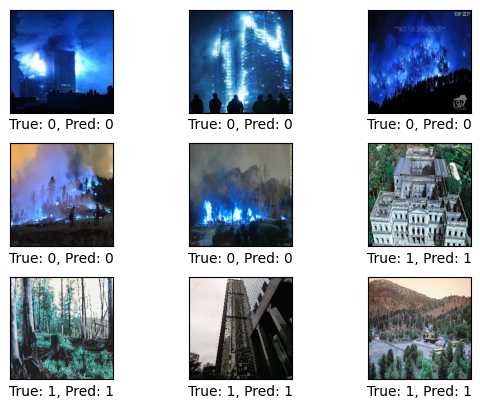

In [24]:
#Plotting images
plot_images(images=images, cls_true=cls_true, cls_pred=cls_pred)

In [60]:
# incorrect

In [81]:
#y_pred_all is an array of the predicted class-number for all images in the test-set
y_predprob_all = model.predict(X_calamity).reshape(-1)
y_pred_all = [1 if prob > 0.5 else 0 for prob in y_predprob_all]

# Boolean array whether the predicted class is incorrect.
incorrect = (y_pred_all != y_calamity)
# Get the images from the test-set that have been incorrectly classified
images_inc = X_calamity[incorrect]


#Get the predicted classes for those images
cls_pred_inc = [y_pred_all[inc] for inc in incorrect if inc==True]
#Get the true classes for those images
cls_true_inc = [y_calamity[inc] for inc in incorrect if inc==True]


16/16 [==============================] - 0s 14ms/step


C:\Users\Alienware\AppData\Local\Temp\ipykernel_44632\1807576585.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  cls_pred_inc = [y_pred_all[inc] for inc in incorrect if inc==True]


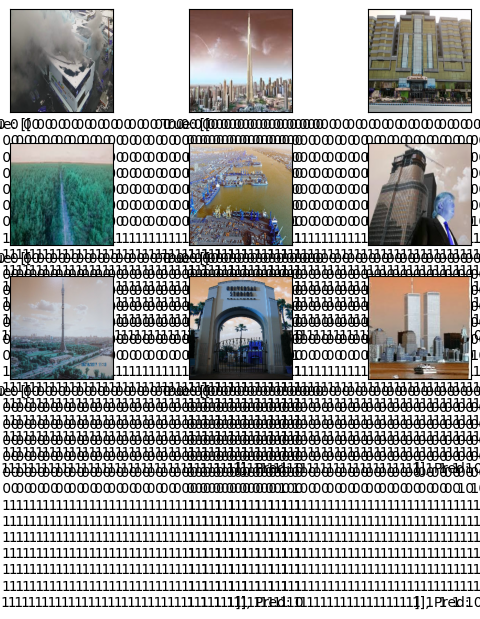

In [86]:

#Plot the first 9 incorrect images
plot_images(images_inc[0:9], cls_true_inc[0:9], cls_pred_inc[0:9])
